In [39]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from test_cases import *
from tests import *
from model_tests import *
from inits import *
from components  import *
from util import *
from model2l import *
from modelnl import *

In [2]:
def launch_init_params_test(): 
    parameters = initialize_parameters(3,2,1)

    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

    initialize_parameters_test(initialize_parameters)

In [3]:
launch_init_params_test()

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]
 All tests passed.


In [4]:
def launch_init_params_deep_test():
    # test init parameters
    parameters = initialize_parameters_deep([5,4,3], rs=3)

    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

    initialize_parameters_deep_test(initialize_parameters_deep)

In [5]:
launch_init_params_deep_test()

W1 = [[ 0.79989897  0.19521314  0.04315498 -0.83337927 -0.12405178]
 [-0.15865304 -0.03700312 -0.28040323 -0.01959608 -0.21341839]
 [-0.58757818  0.39561516  0.39413741  0.76454432  0.02237573]
 [-0.18097724 -0.24389238 -0.69160568  0.43932807 -0.49241241]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.59252326 -0.10282495  0.74307418  0.11835813]
 [-0.51189257 -0.3564966   0.31262248 -0.08025668]
 [-0.38441818 -0.11501536  0.37252813  0.98805539]]
b2 = [[0.]
 [0.]
 [0.]]
 All tests passed.


In [6]:
def launch_linear_fpass_test():
    t_A, t_W, t_b = linear_forward_test_case()
    t_Z, t_linear_cache = linear_forward(t_A, t_W, t_b)
    print("Z = " + str(t_Z))

    linear_forward_test(linear_forward)

In [7]:
launch_linear_fpass_test()

Z = [[ 3.26295337 -1.23429987]]
 All tests passed.


In [8]:
def launch_linear_act_fpass_test():
    t_A_prev, t_W, t_b = linear_activation_forward_test_case()

    t_A, t_linear_activation_cache = linear_activation_forward(t_A_prev, t_W, t_b, activation = "sigmoid")
    print("With sigmoid: A = " + str(t_A))

    t_A, t_linear_activation_cache = linear_activation_forward(t_A_prev, t_W, t_b, activation = "relu")
    print("With ReLU: A = " + str(t_A))

    linear_activation_forward_test(linear_activation_forward)

In [9]:
launch_linear_act_fpass_test()

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]
 All tests passed.


In [10]:
def launch_L_modelfpass_test():
    t_X, t_parameters = L_model_forward_test_case_2hidden()
    t_AL, t_caches = L_model_forward(t_X, t_parameters)

    print("AL = " + str(t_AL))

    L_model_forward_test(L_model_forward)

In [11]:
launch_L_modelfpass_test()

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
 All tests passed.


In [12]:
def launch_compute_cost_test():
    t_Y, t_AL = compute_cost_test_case()
    t_cost = compute_cost(t_AL, t_Y)

    print("Cost: " + str(t_cost))

    compute_cost_test(compute_cost)

In [13]:
launch_compute_cost_test()

Cost: 0.2797765635793422
 All tests passed.


In [14]:
def launch_linear_backward_prop_test(): 
    t_dZ, t_linear_cache = linear_backward_test_case()
    t_dA_prev, t_dW, t_db = linear_backward(t_dZ, t_linear_cache)

    print("dA_prev: " + str(t_dA_prev))
    print("dW: " + str(t_dW))
    print("db: " + str(t_db))

    linear_backward_test(linear_backward)

In [15]:
launch_linear_backward_prop_test()

dA_prev: [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW: [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db: [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]
 All tests passed.


In [16]:
def launch_linear_act_backward_prop_test():
    t_dAL, t_linear_activation_cache = linear_activation_backward_test_case()

    t_dA_prev, t_dW, t_db = linear_activation_backward(t_dAL, t_linear_activation_cache, activation = "sigmoid")
    print("With sigmoid: dA_prev = " + str(t_dA_prev))
    print("With sigmoid: dW = " + str(t_dW))
    print("With sigmoid: db = " + str(t_db))

    t_dA_prev, t_dW, t_db = linear_activation_backward(t_dAL, t_linear_activation_cache, activation = "relu")
    print("With relu: dA_prev = " + str(t_dA_prev))
    print("With relu: dW = " + str(t_dW))
    print("With relu: db = " + str(t_db))

    linear_activation_backward_test(linear_activation_backward)

In [17]:
launch_linear_act_backward_prop_test()

With sigmoid: dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
With sigmoid: dW = [[ 0.10266786  0.09778551 -0.01968084]]
With sigmoid: db = [[-0.05729622]]
With relu: dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
With relu: dW = [[ 0.44513824  0.37371418 -0.10478989]]
With relu: db = [[-0.20837892]]
 All tests passed.


In [18]:
def launch_L_model_backward_test():
    t_AL, t_Y_assess, t_caches = L_model_backward_test_case()
    grads = L_model_backward(t_AL, t_Y_assess, t_caches)

    print("dA0 = " + str(grads['dA0']))
    print("dA1 = " + str(grads['dA1']))
    print("dW1 = " + str(grads['dW1']))
    print("dW2 = " + str(grads['dW2']))
    print("db1 = " + str(grads['db1']))
    print("db2 = " + str(grads['db2']))

    L_model_backward_test(L_model_backward)

In [19]:
launch_L_model_backward_test()

dA0 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]
dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
dW2 = [[-0.39202432 -0.13325855 -0.04601089]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
db2 = [[0.15187861]]
 All tests passed.


In [20]:
def launch_update_parameters_test():
    t_parameters, grads = update_parameters_test_case()
    t_parameters = update_parameters(t_parameters, grads, 0.1)

    print ("W1 = "+ str(t_parameters["W1"]))
    print ("b1 = "+ str(t_parameters["b1"]))
    print ("W2 = "+ str(t_parameters["W2"]))
    print ("b2 = "+ str(t_parameters["b2"]))

    update_parameters_test(update_parameters)

In [21]:
launch_update_parameters_test()

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]
 All tests passed.


In [22]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [23]:
# reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# standardize data to have feature values between 0 and 1
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [24]:
# hyper parameters for the 2-nn model
n_x = train_x.shape[0]
n_h = 7
n_y = 1
learning_rate = 0.0075

In [25]:
def launch_two_layer_model_beta_test():
    parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2, print_cost=False)

    print("Cost after first iteration: " + str(costs[0]))

    two_layer_model_test(two_layer_model)

In [26]:
launch_two_layer_model_beta_test()

Cost after iteration 1: 0.6926114346158595
Cost after first iteration: 0.6930497356599887
Cost after iteration 1: 0.6915746967050506
Cost after iteration 1: 0.6915746967050506
Cost after iteration 1: 0.6915746967050506
Cost after iteration 2: 0.6524135179683452
 All tests passed.


In [27]:
def train2layerNN():
    parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
    plot_costs(costs, learning_rate)
    
    return parameters

Cost after iteration 0: 0.6930497356599887
Cost after iteration 100: 0.6464320953428847
Cost after iteration 200: 0.6325140647912676
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764732
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.433916315122575
Cost after iteration 800: 0.4007977536203886
Cost after iteration 900: 0.3580705011323795
Cost after iteration 1000: 0.339428153836641
Cost after iteration 1100: 0.30527536361962715
Cost after iteration 1200: 0.27491377282130275
Cost after iteration 1300: 0.24681768210614785
Cost after iteration 1400: 0.19850735037466263
Cost after iteration 1500: 0.1744831811255658
Cost after iteration 1600: 0.1708076297809784
Cost after iteration 1700: 0.1130652456216478
Cost after iteration 1800: 0.09629426845937131
Cost after iteration 1900: 0.0834261795972688
Cost after iteration 2000: 0.07439078704319095
Cost after iteration 2100: 0.0663074813226

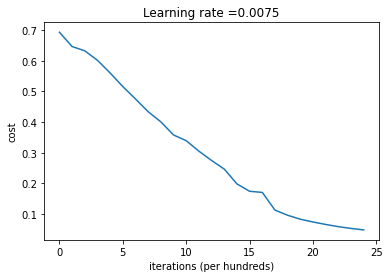

In [28]:
#launch training
trained_parameters = train2layerNN()

In [29]:
predictions_train = predict(train_x, train_y, trained_parameters, "train")
predictions_test = predict(test_x, test_y, trained_parameters, "test")
assert(np.sum((predictions_train == train_y)/train_x.shape[1]) == 0.9999999999999998)
assert(np.sum((predictions_test == test_y)/test_x.shape[1]) == 0.72)

Accuracy on train set: 0.9999999999999998
Accuracy on test set: 0.72


In [30]:
def launch_L_layer_model_beta_test():
    parameters, costs = L_layer_model(train_x, train_y, layers_dims = [n_x, 20, n_h, 5, n_y], num_iterations = 1, print_cost = False, rs=1)

    print("Cost after first iteration: " + str(costs[0]))

    L_layer_model_test(L_layer_model)

In [31]:
launch_L_layer_model_beta_test()

Cost after iteration 0: 0.7717493284237688
Cost after first iteration: 0.7717493284237688
Cost after iteration 1: 0.7070709008912569
Cost after iteration 1: 0.7070709008912569
Cost after iteration 1: 0.7070709008912569
Cost after iteration 2: 0.7063462654190897
 All tests passed.


In [32]:
def trainNlayerNN():
    parameters, costs = L_layer_model(train_x, train_y, layers_dims = [n_x, 20, n_h, 5, n_y], num_iterations = 2500, print_cost = True, rs=1)
    plot_costs(costs, learning_rate)
    
    return parameters

Cost after iteration 0: 0.7717493284237688
Cost after iteration 100: 0.6720534400822913
Cost after iteration 200: 0.6482632048575223
Cost after iteration 300: 0.6115068816101359
Cost after iteration 400: 0.567047326836611
Cost after iteration 500: 0.5401376634547794
Cost after iteration 600: 0.5279299569455262
Cost after iteration 700: 0.4654773771766849
Cost after iteration 800: 0.3691258524959283
Cost after iteration 900: 0.3917469743480533
Cost after iteration 1000: 0.31518698886006186
Cost after iteration 1100: 0.2726998441789389
Cost after iteration 1200: 0.2374185340026814
Cost after iteration 1300: 0.1996012053220865
Cost after iteration 1400: 0.18926300388463346
Cost after iteration 1500: 0.16118854665827748
Cost after iteration 1600: 0.14821389662363327
Cost after iteration 1700: 0.13777487812972947
Cost after iteration 1800: 0.12974017549190134
Cost after iteration 1900: 0.12122535068005211
Cost after iteration 2000: 0.11382060668633691
Cost after iteration 2100: 0.1078392852

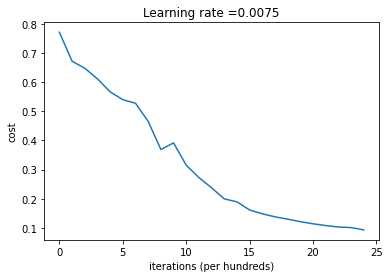

In [33]:
trained_parameters1 = trainNlayerNN()

In [35]:
predictions_train1 = predict(train_x, train_y, trained_parameters1, "train")
predictions_test1 = predict(test_x, test_y, trained_parameters1, "test")
assert(np.sum((predictions_train1 == train_y)/train_x.shape[1]) == 0.9856459330143539)
assert(np.sum((predictions_test1 == test_y)/test_x.shape[1]) == 0.8)

Accuracy on train set: 0.9856459330143539
Accuracy on test set: 0.8


In [44]:
def predict_image(image_name, lb):
    my_label_y = [lb]

    fname = "images/" + image_name
    image = np.array(Image.open(fname).resize((num_px, num_px)))
    plt.imshow(image)
    image = image / 255.
    image = image.reshape((1, num_px * num_px * 3)).T

    my_predicted_image = predict(image, my_label_y, trained_parameters1, "test")


    print ("y = " + str(np.squeeze(my_predicted_image)) + ",model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

Accuracy on test set: 1.0
y = 1.0,model predicts a "cat" picture.


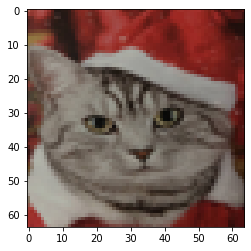

In [45]:
predict_image(image_name = "christmas_cat.jpg", lb = 1)